In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import numpy as np
import pandas as pd

tweets = []
with open('trainingdata-all-annotations.txt','r', encoding = 'iso-8859-1') as f:
    while True:
        line = f.readline()
        if not line:
            break
        tweets.append(line.split('\t'))
        
mat = np.array(tweets)
mat = np.delete(mat, 0, axis=0)

df_training = pd.DataFrame(mat, columns = ['ID','Target','Tweet','Stance','Opinion towards', 'Sentiment'])
df_training = df_training.drop(['ID','Opinion towards', 'Sentiment'], axis=1)

print(df_training)

                        Target  \
0                      Atheism   
1                      Atheism   
2                      Atheism   
3                      Atheism   
4                      Atheism   
...                        ...   
2809  Legalization of Abortion   
2810  Legalization of Abortion   
2811  Legalization of Abortion   
2812  Legalization of Abortion   
2813  Legalization of Abortion   

                                                  Tweet   Stance  
0     dear lord thank u for all of ur blessings forg...  AGAINST  
1     Blessed are the peacemakers, for they shall be...  AGAINST  
2     I am not conformed to this world. I am transfo...  AGAINST  
3     Salah should be prayed with #focus and #unders...  AGAINST  
4     And stay in your houses and do not display you...  AGAINST  
...                                                 ...      ...  
2809  There's a law protecting unborn eagles, but no...  AGAINST  
2810  I am 1 in 3... I have had an abortion #Abortio...

In [3]:
tweets = []
with open('testdata-taskA-all-annotations.txt','r', encoding = 'iso-8859-1') as f:
    while True:
        line = f.readline()
        if not line:
            break
        tweets.append(line.split('\t'))
        
mat = np.array(tweets)
mat = np.delete(mat, 0, axis=0)

df_testing = pd.DataFrame(mat, columns = ['ID','Target','Tweet','Stance','Opinion towards', 'Sentiment'])
df_testing = df_testing.drop(['ID','Opinion towards', 'Sentiment'], axis=1)

print(df_testing)

                        Target  \
0                      Atheism   
1                      Atheism   
2                      Atheism   
3                      Atheism   
4                      Atheism   
...                        ...   
1244  Legalization of Abortion   
1245  Legalization of Abortion   
1246  Legalization of Abortion   
1247  Legalization of Abortion   
1248  Legalization of Abortion   

                                                  Tweet   Stance  
0     He who exalts himself shall      be humbled; a...  AGAINST  
1     RT @prayerbullets: I remove Nehushtan -previou...  AGAINST  
2     @Brainman365 @heidtjj @BenjaminLives I have so...  AGAINST  
3     #God is utterly powerless without Human interv...  AGAINST  
4     @David_Cameron   Miracles of #Multiculturalism...  AGAINST  
...                                                 ...      ...  
1244  @MetalheadMonty @tom_six I followed him before...     NONE  
1245  For he who avenges blood remembers, he does no...

In [4]:
print(df_testing['Stance'])

0       AGAINST
1       AGAINST
2       AGAINST
3       AGAINST
4       AGAINST
         ...   
1244       NONE
1245    AGAINST
1246    AGAINST
1247    AGAINST
1248    AGAINST
Name: Stance, Length: 1249, dtype: object


In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()

le1.fit(df_training['Stance'])
df_training['Stance'] = le1.transform(df_training['Stance'])
df_testing['Stance'] = le1.transform(df_testing['Stance'])

le2.fit(df_training['Target'])
df_training['Target'] = le2.transform(df_training['Target'])
df_testing['Target'] = le2.transform(df_testing['Target'])
print(len(df_training['Target']))

df_training.head()

2814


,Target,Tweet,Stance
0,0,dear lord thank u for all of ur blessings forg...,0
1,0,"Blessed are the peacemakers, for they shall be...",0
2,0,I am not conformed to this world. I am transfo...,0
3,0,Salah should be prayed with #focus and #unders...,0
4,0,And stay in your houses and do not display you...,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

cols_to_norm = ['Target']
df_training[cols_to_norm] = MinMaxScaler().fit_transform(df_training[cols_to_norm])
df_testing[cols_to_norm] = MinMaxScaler().fit_transform(df_testing[cols_to_norm])

In [7]:
from nltk.stem.porter import PorterStemmer
import re

porter_stemmer = PorterStemmer()

def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [8]:
unique_words = set();
for string in df_training['Tweet']:
    words = stemming_tokenizer(string)
    unique_words.update(words)
for string in df_testing['Tweet']:
    words = stemming_tokenizer(string)
    unique_words.update(words)
print(len(unique_words))

9793


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer( stop_words = 'english', tokenizer=stemming_tokenizer, vocabulary=unique_words)

# Compute the TF-IDF matrix
training_tfidf = vectorizer.fit_transform(df_training['Tweet'])
testing_tfidf = vectorizer.fit_transform(df_testing['Tweet'])

X_train = pd.DataFrame(training_tfidf.toarray(), columns=vectorizer.get_feature_names())
X_train['Target'] = df_training['Target']
X_train.head()

/Users/caryslekander/opt/anaconda3/envs/python38env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', '

,-,--,-------,--isaiah,--ronald,-2,-act,-babi,-blais,-but,...,zerofootprint,zim,zinta,zip,zmanoj,zoe,zombieneith,zommer,zubair,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X_test = pd.DataFrame(testing_tfidf.toarray(), columns=vectorizer.get_feature_names())
X_test['Target'] = df_testing['Target']
X_test.head()

,-,--,-------,--isaiah,--ronald,-2,-act,-babi,-blais,-but,...,zerofootprint,zim,zinta,zip,zmanoj,zoe,zombieneith,zommer,zubair,Target
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.297131,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y_train = df_training.Stance.astype(np.int32)
y_test = df_testing.Stance.astype(np.int32)

In [12]:
def print_results(results):
    correct_favor = len(results[(results['Actual Stance']=='FAVOR') & (results['Predicted Stance']=='FAVOR')])
    favor_perct = correct_favor / len(results[(results['Actual Stance']=='FAVOR')])
    correct_against = len(results[(results['Actual Stance']=='AGAINST') & (results['Predicted Stance']=='AGAINST')])
    against_perct = correct_against / len(results[(results['Actual Stance']=='AGAINST')])
    correct_none = len(results[(results['Actual Stance']=='NONE') & (results['Predicted Stance']=='NONE')])
    none_perct = correct_none / len(results[(results['Actual Stance']=='NONE')])
    print(f"F: {correct_favor},  {favor_perct*100}%")
    print(f"A: {correct_against},  {against_perct*100}%")
    print(f"N: {correct_none},  {none_perct*100}%")


# Basic Logistic Regression

In [13]:
model = LogisticRegression(solver='liblinear', random_state=0, max_iter = 500)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
model.predict_proba(X_test)

array([[0.52861993, 0.22510041, 0.24627966],
       [0.66088052, 0.19601606, 0.14310342],
       [0.42304308, 0.27075295, 0.30620397],
       ...,
       [0.6503215 , 0.16831224, 0.18136626],
       [0.49507971, 0.16034102, 0.34457928],
       [0.56499471, 0.13069243, 0.30431286]])

In [16]:
y_hat = model.predict(X_test)

In [17]:
model.score(X_test, y_test)

0.6325060048038431

In [18]:
results_for_print = pd.DataFrame()
results_for_print['Target'] = X_test['Target']
results_for_print['Actual Stance'] = le1.inverse_transform(y_test)

In [19]:
results = pd.DataFrame()
results['Target'] = X_test['Target']
results['Actual Stance'] = le1.inverse_transform(y_test)
results['Predicted Stance 1'] = le1.inverse_transform(y_hat)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(results)

      Target Actual Stance Predicted Stance 1
0       0.00       AGAINST            AGAINST
1       0.00       AGAINST            AGAINST
2       0.00       AGAINST            AGAINST
3       0.00       AGAINST            AGAINST
4       0.00       AGAINST            AGAINST
5       0.00       AGAINST               NONE
6       0.00       AGAINST              FAVOR
7       0.00       AGAINST            AGAINST
8       0.00       AGAINST               NONE
9       0.00       AGAINST            AGAINST
10      0.00       AGAINST               NONE
11      0.00       AGAINST              FAVOR
12      0.00       AGAINST            AGAINST
13      0.00       AGAINST              FAVOR
14      0.00       AGAINST            AGAINST
15      0.00       AGAINST            AGAINST
16      0.00       AGAINST            AGAINST
17      0.00       AGAINST            AGAINST
18      0.00       AGAINST            AGAINST
19      0.00       AGAINST            AGAINST
20      0.00       AGAINST        

In [20]:
results_for_print['Predicted Stance'] = results['Predicted Stance 1']
print_results(results_for_print)

F: 113,  37.17105263157895%
A: 623,  87.13286713286713%
N: 54,  23.47826086956522%


In [21]:
print("Topic 1")
print_results(results_for_print[(results_for_print['Target'] == 0.0)])
print("Topic 2")
print_results(results_for_print[(results_for_print['Target'] == 0.25)])
print("Topic 3")
print_results(results_for_print[(results_for_print['Target'] == 0.5)])
print("Topic 4")
print_results(results_for_print[(results_for_print['Target'] == 0.75)])
print("Topic 5")
print_results(results_for_print[(results_for_print['Target'] == 1.0)])

Topic 1
F: 11,  34.375%
A: 135,  84.375%
N: 7,  25.0%
Topic 2
F: 76,  61.78861788617886%
A: 7,  63.63636363636363%
N: 12,  34.285714285714285%
Topic 3
F: 19,  32.758620689655174%
A: 148,  80.87431693989072%
N: 16,  36.36363636363637%
Topic 4
F: 0,  0.0%
A: 158,  91.86046511627907%
N: 11,  14.102564102564102%
Topic 5
F: 7,  15.217391304347828%
A: 175,  92.5925925925926%
N: 8,  17.77777777777778%


In [22]:
from sklearn import metrics as mt

print(mt.confusion_matrix(y_test,y_hat))
print(mt.classification_report(y_test,y_hat))

[[623  60  32]
 [173 113  18]
 [160  16  54]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.75       715
           1       0.60      0.37      0.46       304
           2       0.52      0.23      0.32       230

    accuracy                           0.63      1249
   macro avg       0.59      0.49      0.51      1249
weighted avg       0.61      0.63      0.60      1249



# Logistic Regression with Class Balance

In [23]:
model = LogisticRegression(solver='liblinear', random_state=0, max_iter = 500, class_weight='balanced')

In [24]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
model.predict_proba(X_test)

array([[0.45621182, 0.25733209, 0.28645609],
       [0.60319224, 0.23158222, 0.16522554],
       [0.35189648, 0.30133304, 0.34677048],
       ...,
       [0.59035047, 0.19970905, 0.20994048],
       [0.42395735, 0.18185844, 0.39418421],
       [0.49235965, 0.15055274, 0.35708761]])

In [26]:
y_hat = model.predict(X_test)

In [27]:
model.score(X_test, y_test)

0.610088070456365

In [28]:
results['Predicted Stance 2'] = le1.inverse_transform(y_hat)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(results)

      Target Actual Stance Predicted Stance 1 Predicted Stance 2
0       0.00       AGAINST            AGAINST            AGAINST
1       0.00       AGAINST            AGAINST            AGAINST
2       0.00       AGAINST            AGAINST            AGAINST
3       0.00       AGAINST            AGAINST            AGAINST
4       0.00       AGAINST            AGAINST              FAVOR
5       0.00       AGAINST               NONE               NONE
6       0.00       AGAINST              FAVOR              FAVOR
7       0.00       AGAINST            AGAINST            AGAINST
8       0.00       AGAINST               NONE               NONE
9       0.00       AGAINST            AGAINST            AGAINST
10      0.00       AGAINST               NONE               NONE
11      0.00       AGAINST              FAVOR              FAVOR
12      0.00       AGAINST            AGAINST            AGAINST
13      0.00       AGAINST              FAVOR              FAVOR
14      0.00       AGAINS

In [29]:
results_for_print['Predicted Stance'] = results['Predicted Stance 2']
print_results(results_for_print)

F: 151,  49.67105263157895%
A: 496,  69.37062937062936%
N: 115,  50.0%


In [30]:
print("Topic 1")
print_results(results_for_print[(results_for_print['Target'] == 0.0)])
print("Topic 2")
print_results(results_for_print[(results_for_print['Target'] == 0.25)])
print("Topic 3")
print_results(results_for_print[(results_for_print['Target'] == 0.5)])
print("Topic 4")
print_results(results_for_print[(results_for_print['Target'] == 0.75)])
print("Topic 5")
print_results(results_for_print[(results_for_print['Target'] == 1.0)])

Topic 1
F: 16,  50.0%
A: 103,  64.375%
N: 14,  50.0%
Topic 2
F: 87,  70.73170731707317%
A: 3,  27.27272727272727%
N: 17,  48.57142857142857%
Topic 3
F: 27,  46.55172413793103%
A: 110,  60.10928961748634%
N: 27,  61.36363636363637%
Topic 4
F: 9,  20.0%
A: 133,  77.32558139534885%
N: 44,  56.41025641025641%
Topic 5
F: 12,  26.08695652173913%
A: 147,  77.77777777777779%
N: 13,  28.888888888888886%


In [31]:
from sklearn import metrics as mt

print(mt.confusion_matrix(y_test,y_hat))
print(mt.classification_report(y_test,y_hat))

[[496 123  96]
 [103 151  50]
 [ 83  32 115]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       715
           1       0.49      0.50      0.50       304
           2       0.44      0.50      0.47       230

    accuracy                           0.61      1249
   macro avg       0.55      0.56      0.56      1249
weighted avg       0.62      0.61      0.61      1249



# Multi-Layer Percptron

In [32]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [33]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2

    
    
    @staticmethod
    def _sigmoid(z): # no changes needed 
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
        
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term    
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [34]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None): #gotta be honest this one scared me so I didn't change anything yet
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                self.W1 -= self.eta * gradW1
                self.W2 -= self.eta * gradW2
                self.b1 -= self.eta * gradb1
                self.b2 -= self.eta * gradb2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self

In [35]:
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _cost3(self,A4,Y_enc,W1,W2,W3): #not quite sure
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A4)+(1-Y_enc)*np.log(1-A4))))
        L2_term = self._L2_reg3(self.l2_C, W1, W2, W3)
        return cost + L2_term
    
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    def _get_gradient3(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        #ahhhhhhhhhhhhhhhhhhhh idk
        V2 = (A3-Y_enc) # <- this is only line that changed 
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C

        return gradW1, gradW2,gradW3, gradb1, gradb2, gradb3

In [36]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    def _initialize_weights3(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2

In [37]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)
    return yhat

In [38]:
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':75, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

Initial Data :
Resubstitution acc: 0.47690120824449184
Validation acc: 0.5724579663730984


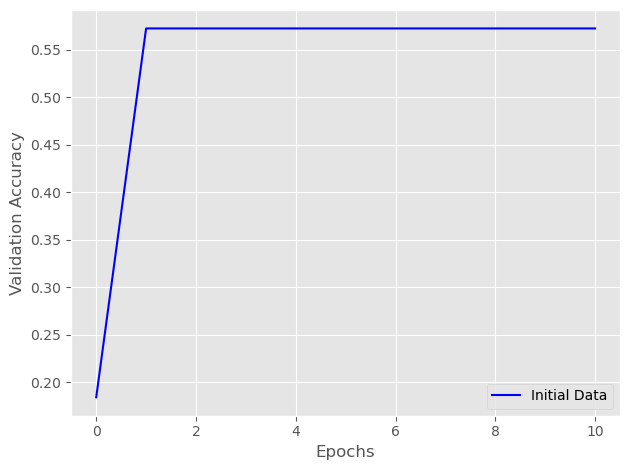

In [39]:
vals['epochs'] = 10
mlp = TLPBetterInitial(**vals)

mlp.fit(X_train, y_train, print_progress=0, XY_test=(X_test, y_test))

y_hat = print_result(mlp,X_train,y_train,X_test,y_test,title="Initial Data",color="blue")

In [40]:
results['Predicted Stance 3'] = le1.inverse_transform(y_hat)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(results)

      Target Actual Stance Predicted Stance 1 Predicted Stance 2  \
0       0.00       AGAINST            AGAINST            AGAINST   
1       0.00       AGAINST            AGAINST            AGAINST   
2       0.00       AGAINST            AGAINST            AGAINST   
3       0.00       AGAINST            AGAINST            AGAINST   
4       0.00       AGAINST            AGAINST              FAVOR   
5       0.00       AGAINST               NONE               NONE   
6       0.00       AGAINST              FAVOR              FAVOR   
7       0.00       AGAINST            AGAINST            AGAINST   
8       0.00       AGAINST               NONE               NONE   
9       0.00       AGAINST            AGAINST            AGAINST   
10      0.00       AGAINST               NONE               NONE   
11      0.00       AGAINST              FAVOR              FAVOR   
12      0.00       AGAINST            AGAINST            AGAINST   
13      0.00       AGAINST              FAVOR   

In [41]:
results_for_print['Predicted Stance'] = results['Predicted Stance 3']
print_results(results_for_print)

F: 0,  0.0%
A: 715,  100.0%
N: 0,  0.0%


In [42]:
print("Topic 1")
print_results(results_for_print[(results_for_print['Target'] == 0.0)])
print("Topic 2")
print_results(results_for_print[(results_for_print['Target'] == 0.25)])
print("Topic 3")
print_results(results_for_print[(results_for_print['Target'] == 0.5)])
print("Topic 4")
print_results(results_for_print[(results_for_print['Target'] == 0.75)])
print("Topic 5")
print_results(results_for_print[(results_for_print['Target'] == 1.0)])

Topic 1
F: 0,  0.0%
A: 160,  100.0%
N: 0,  0.0%
Topic 2
F: 0,  0.0%
A: 11,  100.0%
N: 0,  0.0%
Topic 3
F: 0,  0.0%
A: 183,  100.0%
N: 0,  0.0%
Topic 4
F: 0,  0.0%
A: 172,  100.0%
N: 0,  0.0%
Topic 5
F: 0,  0.0%
A: 189,  100.0%
N: 0,  0.0%


In [43]:
from sklearn import metrics as mt

print(mt.confusion_matrix(y_test,y_hat))
print(mt.classification_report(y_test,y_hat))

[[715   0   0]
 [304   0   0]
 [230   0   0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       715
           1       0.00      0.00      0.00       304
           2       0.00      0.00      0.00       230

    accuracy                           0.57      1249
   macro avg       0.19      0.33      0.24      1249
weighted avg       0.33      0.57      0.42      1249



/Users/caryslekander/opt/anaconda3/envs/python38env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Summary

In [44]:
print("Logistic Regression 1")
results_for_print['Predicted Stance'] = results['Predicted Stance 1']
print_results(results_for_print)
print("Logistic Regression 2")
results_for_print['Predicted Stance'] = results['Predicted Stance 2']
print_results(results_for_print)
print("MLP")
results_for_print['Predicted Stance'] = results['Predicted Stance 3']
print_results(results_for_print)

Logistic Regression 1
F: 113,  37.17105263157895%
A: 623,  87.13286713286713%
N: 54,  23.47826086956522%
Logistic Regression 2
F: 151,  49.67105263157895%
A: 496,  69.37062937062936%
N: 115,  50.0%
MLP
F: 0,  0.0%
A: 715,  100.0%
N: 0,  0.0%
